In [98]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [106]:
tickers = ["BYDDY", "F", "STLA"]

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)

stocks_data = pd.DataFrame()

In [107]:
for stock in tickers:
    try:
        print(f"Mengunduh data saham {stock}")
        data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)
        stocks_data[stock] = data['Adj Close']
        print(f"Berhasil mengunduh data saham {stock}")
    except:
        print(f"Gagal mengunduh data saham {stock}")

Mengunduh data saham BYDDY


[*********************100%***********************]  1 of 1 completed


Berhasil mengunduh data saham BYDDY
Mengunduh data saham F


[*********************100%***********************]  1 of 1 completed


Berhasil mengunduh data saham F
Mengunduh data saham STLA


[*********************100%***********************]  1 of 1 completed

Berhasil mengunduh data saham STLA


In [101]:
null_data = stocks_data.isna().sum()
null_data

BYDDY    0
F        0
STLA     0
dtype: int64

In [102]:
count_data = stocks_data.count()
count_data

BYDDY    2513
F        2513
STLA     2513
dtype: int64

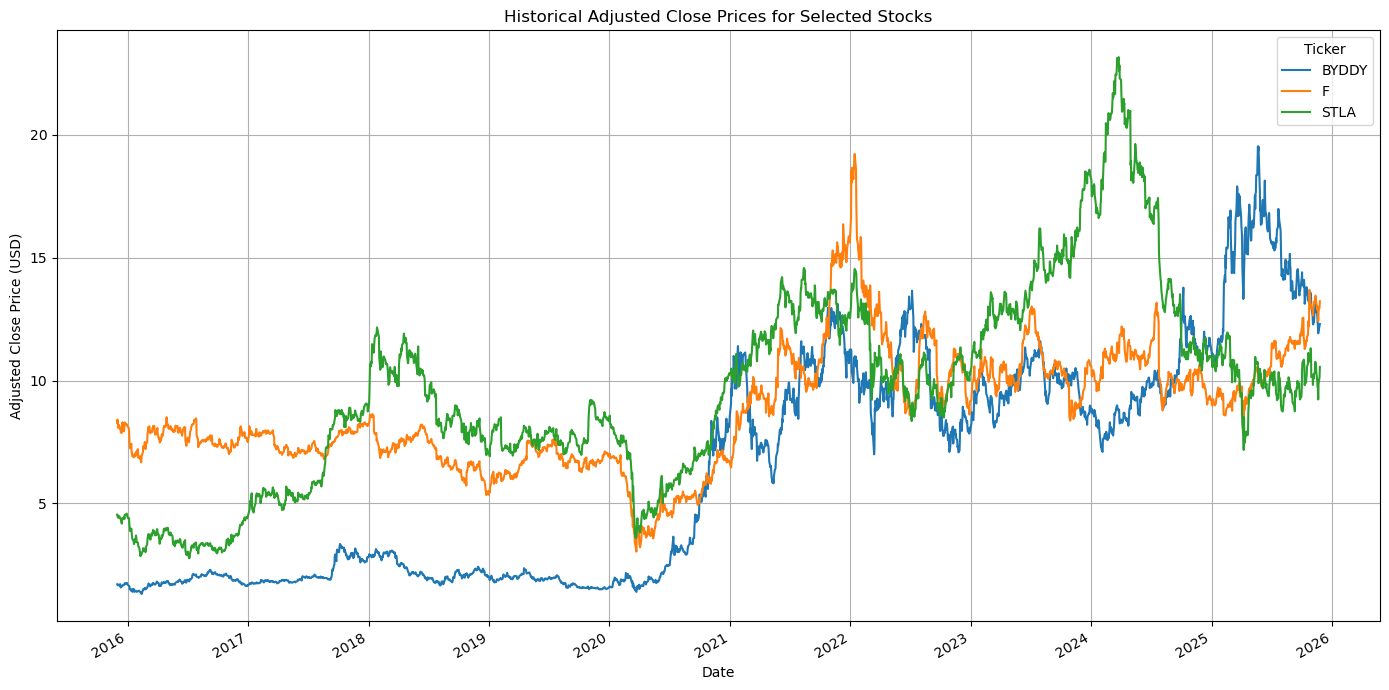

In [108]:
plt.figure(figsize=(14, 7))
stocks_data.plot(ax=plt.gca())
plt.title('Historical Adjusted Close Prices for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
# 1. Tentukan daftar simbol ticker saham
tickers = ['BYDDY', 'F', 'STLA'] 

# 2. Tentukan tanggal mulai dan tanggal akhir
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365) 

# 3. Gunakan yfinance untuk mengunduh data harga saham historis
# Menginisialisasi DataFrame kosong untuk menyimpan 'Adj Close' harga
stock_data_yf = pd.DataFrame()

for ticker in tickers:
    try:
        # Download data ticker
        data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False to reduce output
        if not data.empty:
            if 'Adj Close' in data.columns:
                stock_data_yf[ticker] = data['Adj Close']
            elif 'Close' in data.columns:
                # Mengganti dengan 'Close' apabila 'Adj Close' tidak tersedia 
                stock_data_yf[ticker] = data['Close']
                print(f"Warning: 'Adj Close' not found for {ticker}, using 'Close' price.")
            else:
                print(f"Could not find 'Adj Close' or 'Close' data for {ticker}.")
        else:
            print(f"No data downloaded for {ticker}.")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Hapus baris dengan nilai hilang jika beberapa tanggal tidak ada untuk semua saham
stock_data_yf.dropna(inplace=True)

# 4. Tampilkan lima baris pertama dari DataFrame
print("Data harga saham historis (Adj Close) untuk 5 saham:")
display(stock_data_yf.head())

print("\nInformasi DataFrame:\n")
display(stock_data_yf.info())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11220\1605359685.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False to reduce output


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11220\1605359685.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False to reduce output


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11220\1605359685.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False) # progress=False to reduce output


Data harga saham historis (Adj Close) untuk 5 saham:


,BYDDY,F,STLA
Date,,,
2015-11-30,1.713213,8.279706,4.548220
2015-12-01,1.719530,8.412597,4.545028
2015-12-02,1.710056,8.239261,4.433318
2015-12-03,1.672160,8.077479,4.420551
2015-12-04,1.686371,8.204591,4.481194



Informasi DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2015-11-30 to 2025-11-25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BYDDY   2513 non-null   float64
 1   F       2513 non-null   float64
 2   STLA    2513 non-null   float64
dtypes: float64(3)
memory usage: 78.5 KB


None

In [110]:
print("Informasi Ringkas DataFrame stock_data_yf:")
stock_data_yf.info()

print("\nStatistik Deskriptif DataFrame stock_data_yf:")
display(stock_data_yf.describe())

print("\nJumlah Nilai Hilang per Kolom di stock_data_yf:")
display(stock_data_yf.isnull().sum())

Informasi Ringkas DataFrame stock_data_yf:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2015-11-30 to 2025-11-25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BYDDY   2513 non-null   float64
 1   F       2513 non-null   float64
 2   STLA    2513 non-null   float64
dtypes: float64(3)
memory usage: 78.5 KB

Statistik Deskriptif DataFrame stock_data_yf:


,BYDDY,F,STLA
count,2513.000000,2513.000000,2513.000000
mean,6.426426,8.783868,9.616448
std,4.609307,2.405392,4.000877
min,1.318464,3.042593,2.772707
25%,1.966287,7.059351,7.156744
50%,6.929122,8.210899,9.520000
75%,10.075089,10.402482,11.858657
max,19.521166,19.209185,23.147070



Jumlah Nilai Hilang per Kolom di stock_data_yf:


BYDDY    0
F        0
STLA     0
dtype: int64

In [ ]:

# 4. Hitung daily returns
daily_returns = stock_data_yf.pct_change().dropna()

# 5. Hitung monthly returns
# Resample data to get the last trading day of each month and calculate percentage change
monthly_returns = stock_data_yf.resample('ME').last().pct_change().dropna()

# 6. Normalisasi data
# Divide each price by the price on the first day for each stock
normalized_stock_data = stock_data_yf / stock_data_yf.iloc[0]

# 7. Tampilkan lima baris pertama dari daily_returns, monthly_returns, dan normalized_stock_data
print("\nLima Baris Pertama Daily Returns:")
display(daily_returns.head())

print("\nLima Baris Pertama Monthly Returns:")
display(monthly_returns.head())

print("\nLima Baris Pertama Normalized Stock Data:")
display(normalized_stock_data.head())


Lima Baris Pertama Daily Returns:


,BYDDY,F,STLA
Date,,,
2015-12-01,0.003687,0.016050,-0.000702
2015-12-02,-0.005510,-0.020604,-0.024579
2015-12-03,-0.022161,-0.019635,-0.002880
2015-12-04,0.008499,0.015737,0.013718
2015-12-07,-0.005618,-0.005634,-0.000713



Lima Baris Pertama Monthly Returns:


,BYDDY,F,STLA
Date,,,
2015-12-31,0.000000,-0.016748,-0.018245
2016-01-31,-0.166820,-0.124010,-0.234195
2016-02-29,0.101770,0.047739,-0.026989
2016-03-31,0.149598,0.079137,0.176642
2016-04-30,0.018341,0.015523,0.003722



Lima Baris Pertama Normalized Stock Data:


,BYDDY,F,STLA
Date,,,
2015-11-30,1.000000,1.000000,1.000000
2015-12-01,1.003687,1.016050,0.999298
2015-12-02,0.998157,0.995115,0.974737
2015-12-03,0.976037,0.975576,0.971930
2015-12-04,0.984332,0.990928,0.985263
